In [1]:
import fastf1 as ff1
import fastf1.plotting
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
from utils import DriverRacePaceInfo
from statistics import mode
import numpy as np

In [2]:
ff1.Cache.enable_cache('./cache')
sess = ff1.get_session(2022, "Bahrain", "FP2")
sess.load()

core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v2.2.0]
api            INFO 	Using cached data for driver_info
core          ERROR 	Failed to load data from Ergast API!
Traceback (most recent call last):
  File "/home/mchegini/.conda/envs/f1_env/lib/python3.9/site-packages/fastf1/core.py", line 1407, in _drivers_results_from_ergast
    data = ergast.fetch_results(
  File "/home/mchegini/.conda/envs/f1_env/lib/python3.9/site-packages/fastf1/ergast.py", line 25, in fetch_results
    return _parse_ergast(fetch_day(year, gp, day))[0][sel]
IndexError: list index out of range
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api   

In [3]:
df = pd.DataFrame(sess.laps)
df.dropna(subset=['LapTime'], inplace=True)

In [4]:
df[df["Driver"] == "NOR"]

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
385,0 days 00:19:16.226000,4,0 days 00:01:35.486000,2,1,NaT,NaT,0 days 00:00:30.753000,0 days 00:00:40.918000,0 days 00:00:23.815000,...,306.0,HARD,2.0,True,0 days 00:17:40.740000,McLaren,NOR,1,True,2022-03-18 15:02:40.772
386,0 days 00:21:24.211000,4,0 days 00:02:07.985000,3,1,NaT,NaT,0 days 00:00:42.863000,0 days 00:00:56.877000,0 days 00:00:28.245000,...,225.0,HARD,3.0,True,0 days 00:19:16.226000,McLaren,NOR,1,True,2022-03-18 15:04:16.258
387,0 days 00:22:59.386000,4,0 days 00:01:35.175000,4,1,NaT,NaT,0 days 00:00:30.787000,0 days 00:00:40.590000,0 days 00:00:23.798000,...,307.0,HARD,4.0,True,0 days 00:21:24.211000,McLaren,NOR,1,True,2022-03-18 15:06:24.243
388,0 days 00:25:09.337000,4,0 days 00:02:09.951000,5,1,NaT,NaT,0 days 00:00:44.947000,0 days 00:00:59.121000,0 days 00:00:25.883000,...,259.0,HARD,5.0,True,0 days 00:22:59.386000,McLaren,NOR,1,True,2022-03-18 15:07:59.418
389,0 days 00:26:53.751000,4,0 days 00:01:44.414000,6,2,NaT,0 days 00:26:52.052000,0 days 00:00:34.482000,0 days 00:00:41.389000,0 days 00:00:28.543000,...,307.0,HARD,1.0,True,0 days 00:25:09.337000,McLaren,NOR,1,False,2022-03-18 15:10:09.369
391,0 days 00:38:34.063000,4,0 days 00:02:01.153000,8,2,NaT,NaT,0 days 00:00:39.458000,0 days 00:00:55.336000,0 days 00:00:26.359000,...,306.0,SOFT,3.0,True,0 days 00:36:32.910000,McLaren,NOR,1,True,2022-03-18 15:21:32.942
392,0 days 00:40:07.343000,4,0 days 00:01:33.280000,9,2,NaT,NaT,0 days 00:00:29.967000,0 days 00:00:39.687000,0 days 00:00:23.626000,...,308.0,SOFT,4.0,True,0 days 00:38:34.063000,McLaren,NOR,1,True,2022-03-18 15:23:34.095
393,0 days 00:41:57.702000,4,0 days 00:01:50.359000,10,3,NaT,0 days 00:41:55.912000,0 days 00:00:35.087000,0 days 00:00:47.398000,0 days 00:00:27.874000,...,235.0,SOFT,1.0,True,0 days 00:40:07.343000,McLaren,NOR,1,False,2022-03-18 15:25:07.375
395,0 days 00:54:16.888000,4,0 days 00:01:39.087000,12,3,NaT,NaT,0 days 00:00:31.697000,0 days 00:00:42.985000,0 days 00:00:24.405000,...,281.0,SOFT,7.0,False,0 days 00:52:37.801000,McLaren,NOR,1,True,2022-03-18 15:37:37.833
396,0 days 00:55:55.998000,4,0 days 00:01:39.110000,13,3,NaT,NaT,0 days 00:00:31.674000,0 days 00:00:42.930000,0 days 00:00:24.506000,...,282.0,SOFT,8.0,False,0 days 00:54:16.888000,McLaren,NOR,1,True,2022-03-18 15:39:16.920


In [5]:
driver_names = df.Driver.unique()
driver_infos = [DriverRacePaceInfo(driver, df) for driver in driver_names]

In [6]:
sorted_driver_infos = sorted(driver_infos, key=lambda x: np.median(x.times))

In [7]:
sorted_times = [_.times for _ in sorted_driver_infos]
sorted_names = [_.name for _ in sorted_driver_infos]
sorted_stint_length = [_.stintLength for _ in sorted_driver_infos]
sorted_driver_tyres = [_.stintTyre for _ in sorted_driver_infos]

x_labels = [f"{x1}\n{x3} ({x2})" for (x1, x2, x3) in zip(sorted_names, sorted_stint_length, sorted_driver_tyres)]

sorted_driver_colors = [ff1.plotting.team_color(_.team) for _ in sorted_driver_infos]

In [8]:
red_circle = dict(markerfacecolor='red', marker='o')
medianprops = dict(linestyle='-', linewidth=3, color='yellow')

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (20, 10),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 30,
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'axes.facecolor': 'white'
}
plt.rcParams.update(params)

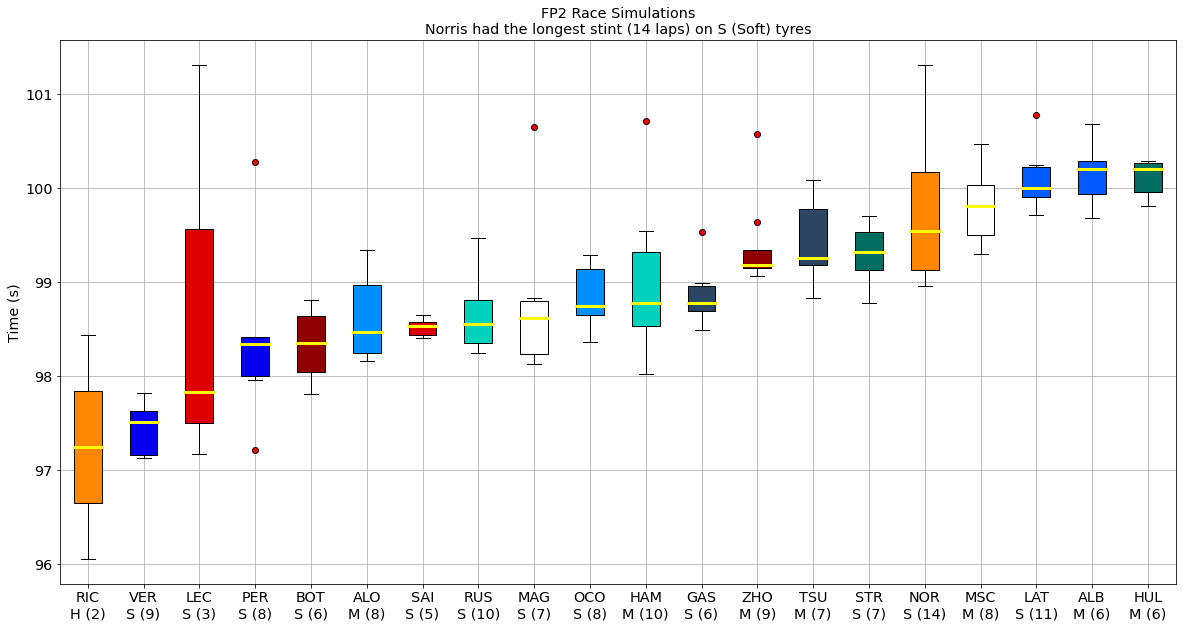

In [9]:
pltbox = plt.boxplot(sorted_times,
            patch_artist=True,
            labels=x_labels,
            flierprops=red_circle,
            medianprops=medianprops)

plt.ylabel("Time (s)")
plt.title("FP2 Race Simulations\nNorris had the longest stint (14 laps) on S (Soft) tyres")

for patch, color in zip(pltbox["boxes"], sorted_driver_colors):
    patch.set_facecolor(color)

plt.grid()
plt.savefig("./Bahrain_RaceSim.jpg")

plt.show()